In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette ='coolwarm')
import warnings 

warnings.filterwarnings(action='ignore')

In [114]:
df = pd.read_csv('./loan.csv', header=0)
# Describe whole loan dataset
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [74]:
df.shape

(39717, 111)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [76]:
# See how many nulls are there in axis=1
print(df.isnull().all(axis=1).sum())

0


In [77]:
# See how many nulls are there in axis=0
print(df.isnull().all(axis=0).sum())

54


In [78]:
# Check for nulls in each column manually
print(df.iloc[:,50].isnull().all(axis=0).sum())
print(df.iloc[:,51].isnull().all(axis=0).sum())
print(df.iloc[:,52].isnull().all(axis=0).sum())
print(df.iloc[:,53].isnull().all(axis=0).sum())
print(df.iloc[:,90].isnull().all(axis=0).sum())
print(df.iloc[:,80:100].isnull().all(axis=0).sum())

1
0
0
1
1
20


In [79]:
# Data Cleaning Starts here

df.drop(df.iloc[:,80:100], inplace=True, axis=1)
df.drop(df.iloc[:,57:78], inplace=True, axis=1)
df.drop(df.iloc[:,53:56], inplace=True, axis=1)
df.drop(df.iloc[:,50:51], inplace=True, axis=1)

In [80]:
# Check for remaining null values

print(df.iloc[:,55:60].isnull().all(axis=0).sum())
print(df.iloc[:,60:61].isnull().all(axis=0).sum())
print(df.iloc[:,57:60].isnull().all(axis=0).sum())
print(df.desc.isnull().sum())
print(df.emp_title.isnull().sum())
print(df.mths_since_last_record.isnull().sum())

5
0
3
12940
2459
36931


In [81]:
# Some more data cleanup of the columns which are either having null values mostly or which won't help in our data analysis

df.drop(df.iloc[:,55:60], inplace=True, axis=1)
df.drop(df.iloc[:,60:61], inplace=True, axis=1)
df.drop(df.iloc[:,57:60], inplace=True, axis=1)
df.drop(['desc'], inplace=True, axis=1)
df.drop(['emp_title'], inplace=True, axis=1)
df.drop(['mths_since_last_record'], inplace=True, axis=1)
df.drop(['tax_liens', 'pub_rec_bankruptcies', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'collections_12_mths_ex_med', 'last_credit_pull_d', 
         'next_pymnt_d', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collection_recovery_fee',
        'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'application_type', 'policy_code', 'pymnt_plan', 'installment', 'initial_list_status'], inplace=True, axis=1)

In [82]:
df.isnull().all(axis=0).sum()

0

In [83]:
# Fill zeros at null places in employee length

df.emp_length.fillna('0',inplace=True)

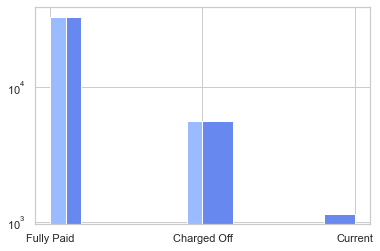

In [84]:
# Univariate analysis starts here

# Plot histogram plots for loan status before removing current accounts and after removing current accounts

plt.hist(df['loan_status'])
plt.yscale('log')
df_not_current = df[df.loan_status != 'Current']
df_not_current.shape
plt.hist(df_not_current['loan_status'])
plt.yscale('log')

In [85]:
df_not_current.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,...,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,B,B2,10+ years,...,1,NaN,3,0,13648,83.70%,9,0.0,0.0,5863.155187
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,C,C4,< 1 year,...,5,NaN,3,0,1687,9.40%,4,0.0,0.0,1008.710000
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,C,C5,10+ years,...,2,NaN,2,0,2956,98.50%,10,0.0,0.0,3005.666844
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,C,C1,10+ years,...,1,35.0,10,0,5598,21%,37,0.0,0.0,12231.890000
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,A,A4,3 years,...,3,NaN,9,0,7963,28.30%,12,0.0,0.0,5632.210000


In [86]:
# Check some more for remaining columns to cleanup
df_not_current.isna().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
url                           0
purpose                       0
title                        11
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq    24905
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prncp                     0
out_prnc

In [87]:
# Some more cleanup

df_not_current.drop(['mths_since_last_delinq'], inplace=True, axis = 1)

<h2 style = "color : Green">1. Analysis based on subgrade </h2>

In [88]:
sub_grade_count = df_not_current.pivot_table(index = 'sub_grade', values = 'loan_status', aggfunc = {'sub_grade': 'count'})
loan_status_grade_count = df_not_current.pivot_table(index = ['sub_grade', 'loan_status'], aggfunc = {'sub_grade': 'count'})
laon_status_grade_percent = round(loan_status_grade_count * 100 / sub_grade_count, 2)
laon_status_grade_percent.unstack()

sub_grade           
loan_status Charged Off Fully Paid
sub_grade                         
A1                 2.63      97.37
A2                 4.91      95.09
A3                 5.69      94.31
A4                 6.20      93.80
A5                 7.99      92.01
B1                 9.52      90.48
B2                11.39      88.61
B3                12.07      87.93
B4                13.50      86.50
B5                13.61      86.39
C1                16.35      83.65
C2                16.62      83.38
C3                18.15      81.85
C4                17.58      82.42
C5                18.02      81.98
D1                17.94      82.06
D2                21.07      78.93
D3                22.94      77.06
D4                23.42      76.58
D5                25.06      74.94
E1                27.42      72.58
E2                26.55      73.45
E3                23.06      76.94
E4                29.72      70.28
E5                28.17      71.83
F1                29.84      70.16
F2                30.04      69.96
F3                29.31      70.69
F4                35.10      64.90
F5                47.79      52.21
G1                32.98      67.02
G2                36.36      63.64
G3                42.22      57.78
G4                24.07      75.93
G5                34.48      65.52

#### - Grade D2 and above tend to default as per above table
#### - Appliers with Grade A or B tend to pay off the loan

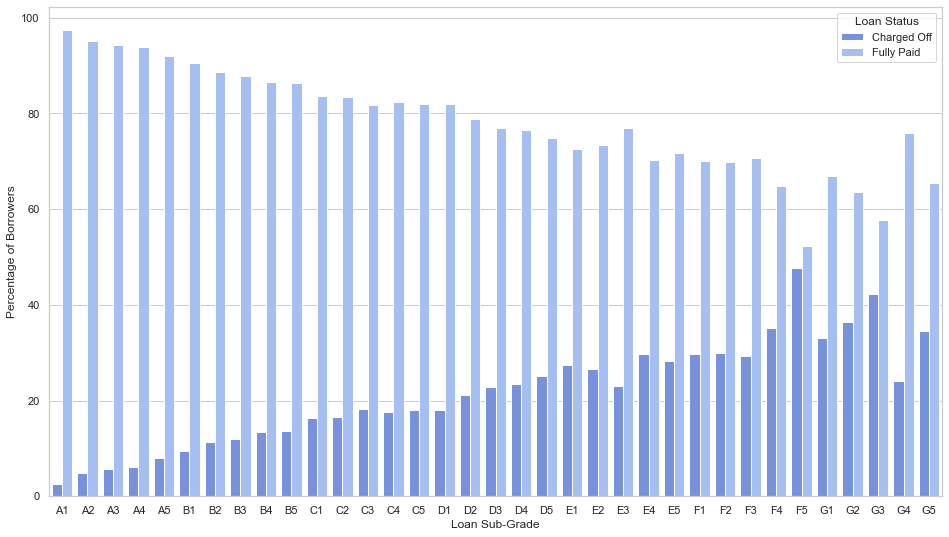

In [89]:
# Check the same by plotting bar plot with subgrade and loan status

laon_status_grade_percent = round(loan_status_grade_count * 100 / sub_grade_count, 2)
laon_status_grade_percent.rename({'sub_grade':'grade'}, axis='columns', inplace = True)
laon_status_grade_percent.reset_index(inplace = True)

plt.figure(figsize = (16, 9))

grade_subgrade_plot = sns.barplot(x = 'sub_grade', y = 'grade', hue = 'loan_status', data = laon_status_grade_percent)
plt.xlabel("Loan Sub-Grade")
plt.ylabel("Percentage of Borrowers")
plt.legend(title = "Loan Status")

plt.show()

<h2 style = "color : Green">2. Analysis based on home ownership </h2>

In [90]:
# Check the percentage count in each category

df_not_current.home_ownership.value_counts()*100/len(df_not_current)

RENT        47.904192
MORTGAGE    44.122145
OWN          7.711849
OTHER        0.254037
NONE         0.007777
Name: home_ownership, dtype: float64

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

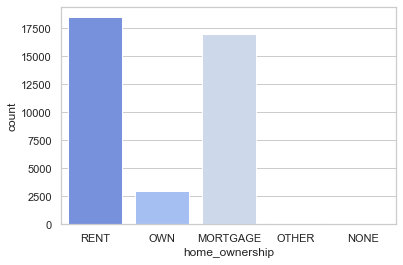

In [91]:
# Check the count in each category by plotting count plot (Univariate)

sns.countplot(df_not_current.home_ownership)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

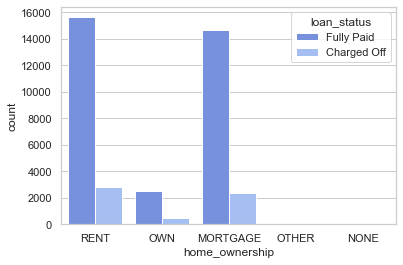

In [92]:
# Plot the count plot for home ownership with loan status (Bivariate)

sns.countplot(data=df_not_current, x=df_not_current.home_ownership, hue="loan_status")

In [93]:
# Get the percentage of loan status for each category in home ownership

df_home_ownership = df_not_current.loc[df_not_current['home_ownership'] != 'NONE']
df_home_ownership['home_ownership'] = df_home_ownership['home_ownership'].astype('category').cat.remove_unused_categories()

# Get percentage of Loan Status in each of the home ownership type
home_own_count = df_home_ownership.pivot_table(index = 'home_ownership', values = 'loan_status', aggfunc = {'home_ownership': 'count'})    
loan_status_home_count = df_home_ownership.pivot_table(index = ['home_ownership', 'loan_status'], aggfunc = {'home_ownership': 'count'})
loan_status_home_percent = round(loan_status_home_count * 100 / home_own_count, 2)

# Get top categories who have Fully Paid
top_cat_paid = list(loan_status_home_percent.iloc[np.arange(1, len(loan_status_home_percent), 2),0])
top_cat_paid.sort(reverse = True)

# Get top categories who have Charged Off
top_cat_choff = list(loan_status_home_percent.iloc[np.arange(0, len(loan_status_home_percent), 2),0])
top_cat_choff.sort(reverse = True)

loan_status_home_percent

home_ownership
home_ownership loan_status                
MORTGAGE       Charged Off           13.67
               Fully Paid            86.33
OTHER          Charged Off           18.37
               Fully Paid            81.63
OWN            Charged Off           14.89
               Fully Paid            85.11
RENT           Charged Off           15.36
               Fully Paid            84.64

#### - Rented or Other categories in home ownership tend to default the loan
#### - Appliers living in own houses or mortgate tend to pay off the loan fully

<h2 style = "color : Green">3. Analysis based on loan purpose </h2>

In [94]:
purpose_count = df_not_current.pivot_table(index = 'purpose', values = 'loan_status', aggfunc = {'purpose': 'count'})    
loan_status_purp_count = df_not_current.pivot_table(index = ['purpose', 'loan_status'], aggfunc = {'purpose': 'count'})
loan_status_purp_percent = loan_status_purp_count * 100 / purpose_count

# Get top categories who have Fully Paid
top_paid = list(loan_status_purp_percent.iloc[np.arange(1, len(loan_status_purp_percent), 2),0])
top_paid.sort(reverse = True)

# Get top categories who have Charged Off
top_choff = list(loan_status_purp_percent.iloc[np.arange(0, len(loan_status_purp_percent), 2),0])
top_choff.sort(reverse = True)

loan_status_purp_percent.style.format({'purpose':'{0:,.2f}%'})

#### - Borrowers who bought the loan for small business purpose tend to default the highest
#### - Borrowers who bought the loan for renewable energy purpose tend to default more
#### - Borrowers who bought the loan for major purchase and wedding purposes tend to fully pay the loan more

<h2 style = "color : Green">4. Analysis based on annual income </h2>

<AxesSubplot:xlabel='annual_inc'>

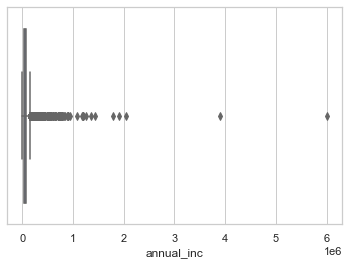

In [95]:
# Check for outliers in annual income using boxplot
sns.boxplot(df_not_current.annual_inc)

In [96]:
# Check by using quantiles

quantiles = df_not_current.annual_inc.quantile([0.05, 0.1, 0.15, 0.20, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.60, 0.65, 0.70, 0.75, 0.8, 0.85, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 1])
quantiles

0.05      24000.00
0.10      30000.00
0.15      34000.00
0.20      37196.16
0.25      40000.00
0.30      44500.00
0.35      48000.00
0.40      50004.00
0.45      54908.80
0.50      58868.00
0.55      61400.00
0.60      65004.00
0.65      70200.00
0.70      75000.00
0.75      82000.00
0.80      90000.00
0.85     100000.00
0.90     115000.00
0.95     140004.00
0.96     150000.00
0.97     165000.00
0.98     187000.00
0.99     234144.00
1.00    6000000.00
Name: annual_inc, dtype: float64

In [97]:
# Take annual income below 0.98 only, as above seems to be outliers

df_not_current = df_not_current[df_not_current.annual_inc < df_not_current.annual_inc.quantile(0.98)]

<AxesSubplot:xlabel='annual_inc', ylabel='Count'>

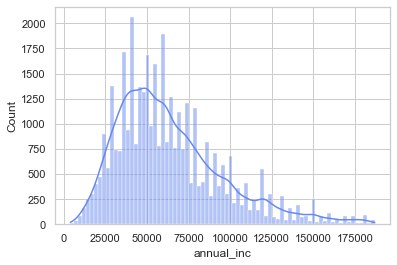

In [98]:
# Analyse annual income using histplot

sns.histplot(df_not_current.annual_inc, kde=True)

In [99]:
def get_annual_income_groups(x):
    if x > 0 and x <= 10000:
        return "0 to 10000" 
    elif x > 10000 and x <= 20000:
        return "10000 to 20000"
    elif x > 20000 and x <= 30000:
        return "20000 to 30000"
    elif x > 30000 and x <= 40000:
        return "30000 to 40000"
    elif x > 40000 and x <= 50000:
        return "40000 to 50000"
    elif x > 50000 and x <= 60000:
        return "50000 to 60000"
    elif x > 60000 and x <= 70000:
        return "60000 to 70000"
    elif x > 70000 and x <= 80000:
        return "70000 to 80000"
    elif x > 80000 and x <= 90000:
        return "80000 to 90000"
    elif x > 90000 and x <= 100000:
        return "90000 to 100000"
    elif x > 100000:
        return "100000 and above"

df_not_current['annual_inc_groups'] = df_not_current.annual_inc.apply(lambda x: get_annual_income_groups(x))

df_annual_inc = df_not_current.loc[:,['annual_inc', 'loan_status']]

# Add the income level labels to the dataframe and get the count of it in each loan status type
df_annual_inc['inc_group'] = pd.cut(df_annual_inc.annual_inc, bins = list(df_not_current.annual_inc.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])))
df_annual_inc = df_annual_inc.loc[:, ['inc_group','loan_status']]
df_annual_inc = df_annual_inc.groupby(['inc_group', 'loan_status']).size()
df_annual_inc

inc_group             loan_status
(30000.0, 37000.0]    Charged Off     573
                      Fully Paid     2574
(37000.0, 44000.0]    Charged Off     610
                      Fully Paid     3155
(44000.0, 50000.0]    Charged Off     591
                      Fully Paid     3335
(50000.0, 57600.0]    Charged Off     527
                      Fully Paid     3005
(57600.0, 65000.0]    Charged Off     629
                      Fully Paid     3539
(65000.0, 75000.0]    Charged Off     530
                      Fully Paid     3438
(75000.0, 87000.0]    Charged Off     406
                      Fully Paid     2785
(87000.0, 110000.0]   Charged Off     458
                      Fully Paid     3620
(110000.0, 186996.0]  Charged Off     385
                      Fully Paid     3092
dtype: int64

In [100]:
annual_income_group = []
for i in df_annual_inc.reset_index().groupby('inc_group').sum()[0]:
    annual_income_group.append(i)
    annual_income_group.append(i)

percent_income = round(100*(df_annual_inc)/annual_income_group, 2).reset_index()
percent_income['percent'] = percent_income[0]
percent_income = percent_income.drop(0, axis=1)
percent_income

,inc_group,loan_status,percent
0,"(30000.0, 37000.0]",Charged Off,18.21
1,"(30000.0, 37000.0]",Fully Paid,81.79
2,"(37000.0, 44000.0]",Charged Off,16.20
3,"(37000.0, 44000.0]",Fully Paid,83.80
4,"(44000.0, 50000.0]",Charged Off,15.05
5,"(44000.0, 50000.0]",Fully Paid,84.95
6,"(50000.0, 57600.0]",Charged Off,14.92
7,"(50000.0, 57600.0]",Fully Paid,85.08
8,"(57600.0, 65000.0]",Charged Off,15.09
9,"(57600.0, 65000.0]",Fully Paid,84.91


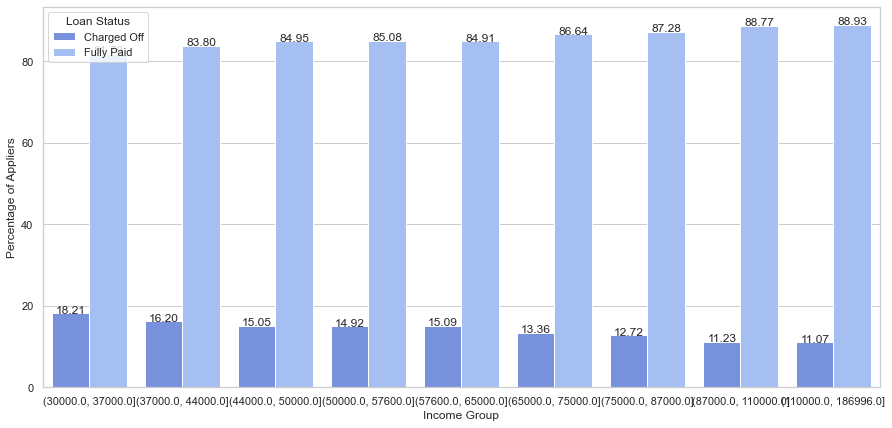

In [101]:
plt.figure(figsize=(15,7))

ax = sns.barplot(y='percent', x='inc_group', hue='loan_status', data=percent_income)
# Get values of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height, '{:1.2f}'.format(height), ha="center") 
    
plt.xlabel("Income Group")
plt.ylabel("Percentage of Appliers")
plt.legend(title = "Loan Status")

plt.show()

<AxesSubplot:xlabel='annual_inc_groups', ylabel='count'>

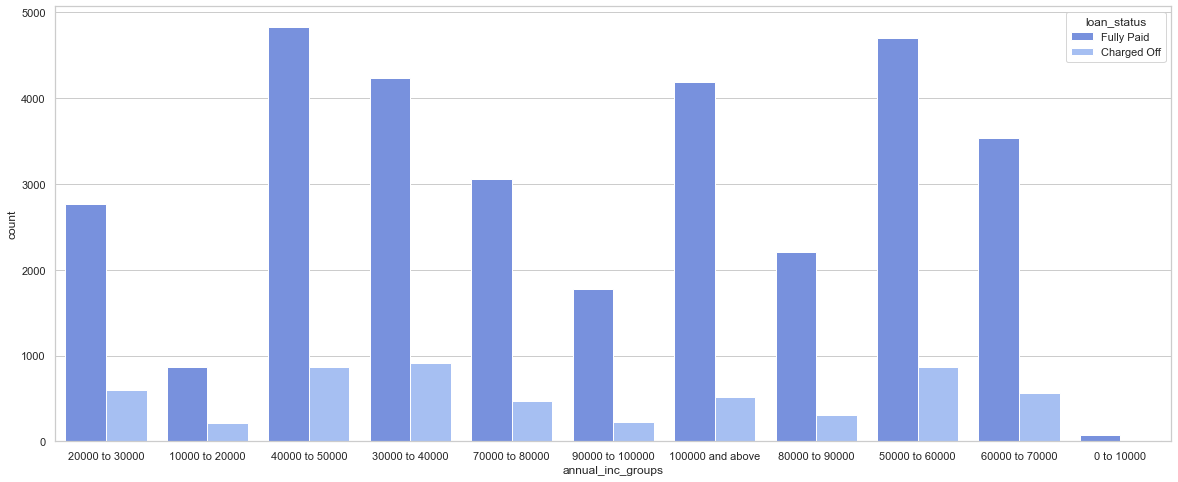

In [102]:
plt.figure(figsize=(20, 8))
sns.countplot(data=df_not_current, x=df_not_current.annual_inc_groups, hue="loan_status")

#### - Based on above information we can clearly see that appliers with annual income < 55,000 tend to default and with > 65,000 tend to repay the loan

<h2 style = "color : Green">5. Analysis based on loan amount </h2>

In [103]:
# Check loan amount quantiles

quantiles = df_not_current.loan_amnt.quantile([0.05, 0.1, 0.15, 0.20, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.60, 0.65, 0.70, 0.75, 0.8, 0.85, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 1])
quantiles

0.05     2400.0
0.10     3000.0
0.15     4000.0
0.20     5000.0
0.25     5100.0
0.30     6000.0
0.35     7000.0
0.40     7500.0
0.45     8000.0
0.50     9600.0
0.55    10000.0
0.60    11000.0
0.65    12000.0
0.70    13200.0
0.75    15000.0
0.80    16000.0
0.85    19000.0
0.90    21000.0
0.95    25000.0
0.96    25000.0
0.97    27575.0
0.98    30000.0
0.99    35000.0
1.00    35000.0
Name: loan_amnt, dtype: float64

In [104]:
loan_amnt_groups = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000]
loan_amnt_labels = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000-30000', '30000-35000']

loan_amnt_df = df_not_current.loc[:,['loan_amnt', 'loan_status']]

# Get the count of loan amount in each loan status type
loan_amnt_df['loan_level'] = pd.cut(loan_amnt_df.loan_amnt, bins=loan_amnt_groups, labels =loan_amnt_labels)
loan_amnt_df = loan_amnt_df.loc[:, ['loan_level','loan_status']]
loan_amnt_df = loan_amnt_df.groupby(['loan_level', 'loan_status']).size()
loan_amnt_df

loan_level   loan_status
0-5000       Charged Off     1309
             Fully Paid      8100
5000-10000   Charged Off     1631
             Fully Paid     11044
10000-15000  Charged Off     1047
             Fully Paid      6504
15000-20000  Charged Off      737
             Fully Paid      3489
20000-25000  Charged Off      518
             Fully Paid      2139
25000-30000  Charged Off      137
             Fully Paid       510
30000-35000  Charged Off      169
             Fully Paid       469
dtype: int64

In [105]:
# Check the same in percentage form

loan_a_count = []
for i in loan_amnt_df.reset_index().groupby('loan_level').sum()[0]:
    loan_a_count.append(i)
    loan_a_count.append(i)

amnt_percentage = round(100*(loan_amnt_df)/loan_a_count, 2).reset_index()
amnt_percentage['percent'] = amnt_percentage[0]
amnt_percentage = amnt_percentage.drop(0, axis=1)
amnt_percentage

,loan_level,loan_status,percent
0,0-5000,Charged Off,13.91
1,0-5000,Fully Paid,86.09
2,5000-10000,Charged Off,12.87
3,5000-10000,Fully Paid,87.13
4,10000-15000,Charged Off,13.87
5,10000-15000,Fully Paid,86.13
6,15000-20000,Charged Off,17.44
7,15000-20000,Fully Paid,82.56
8,20000-25000,Charged Off,19.50
9,20000-25000,Fully Paid,80.50


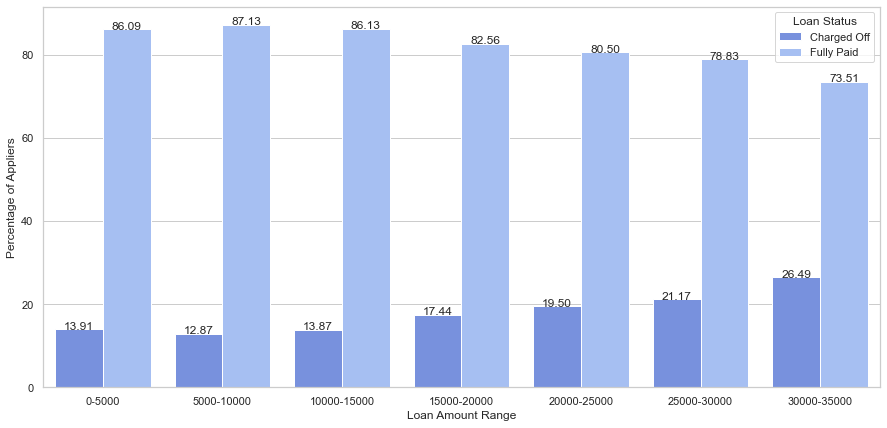

In [106]:
plt.figure(figsize=(15,7))

axes = sns.barplot(y='percent', x='loan_level', hue='loan_status', data=amnt_percentage)
for patch in axes.patches:
    height = patch.get_height()
    axes.text(patch.get_x()+patch.get_width()/2., height, '{:1.2f}'.format(height), ha="center") 
    
plt.xlabel("Loan Amount Range")
plt.ylabel("Percentage of Appliers")
plt.legend(title = "Loan Status")

plt.show()

#### - Appliers with loan amount greater than 15,000 tend to default and with less than 15,000 tend to repay

<h2 style = "color : Green">6. Analysis based on term </h2>

In [107]:
# Get the percentage of each loan status specifically for given terms

term_count = df_not_current.pivot_table(index = 'term', values = 'loan_status', aggfunc = {'term': 'count'})    
loan_status_term_count = df_not_current.pivot_table(index = ['term', 'loan_status'], aggfunc = {'term': 'count'})
loan_status_term_percent = loan_status_term_count * 100 / term_count

# Get top category who has Fully Paid
top_paid = max(loan_status_term_percent.iloc[np.arange(1, len(loan_status_term_percent), 2),0])

# Get top category who has resulted in Charged-Off
top_choff = max(loan_status_term_percent.iloc[np.arange(0, len(loan_status_term_percent), 2),0])

loan_status_term_pcnt_sty = loan_status_term_percent.style.format({'term':'{0:,.2f}%'})
loan_status_term_pcnt_sty

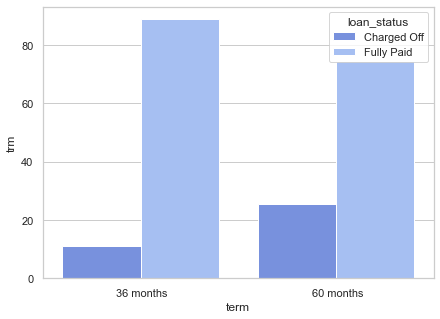

In [108]:
# Draw a bar plot to understand the relationship with loan status
plt.figure(figsize = (7, 5))

loan_status_term_percent.rename({'term':'trm'}, axis='columns', inplace = True)
loan_status_term_percent.reset_index(inplace = True)

sns.barplot(x = 'term', y = 'trm', hue = 'loan_status', data = loan_status_term_percent)
plt.show()

#### - Appliers who have taken the loan for 5 years are more likely to default the loan
#### - Borrowers who have taken the loan for 3 years are more likely to fully pay the loan

<h2 style = "color : Green">7. Analysis based on address state </h2>

In [109]:
# Get percentage of Loan Status in each of the State
addr_state_count = df_not_current.pivot_table(index = 'addr_state', values = 'loan_status', aggfunc = {'addr_state': 'count'})    
loan_status_state_count = df_not_current.pivot_table(index = ['addr_state', 'loan_status'], aggfunc = {'addr_state': 'count'})
loan_status_state_percent = loan_status_state_count * 100 / addr_state_count

# Select top categories which have Fully Paid
top_paid = list(loan_status_state_percent.iloc[np.arange(1, len(loan_status_state_percent), 2),0])
top_paid.sort(reverse = True)

# Select top categories which have resulted in Charged-Off
top_choff = list(loan_status_state_percent.iloc[np.arange(0, len(loan_status_state_percent), 2),0])
top_choff.sort(reverse = True)

loan_status_state_pcnt_sty = loan_status_state_percent.style.format({'addr_state':'{0:,.2f}%'})
loan_status_state_pcnt_sty

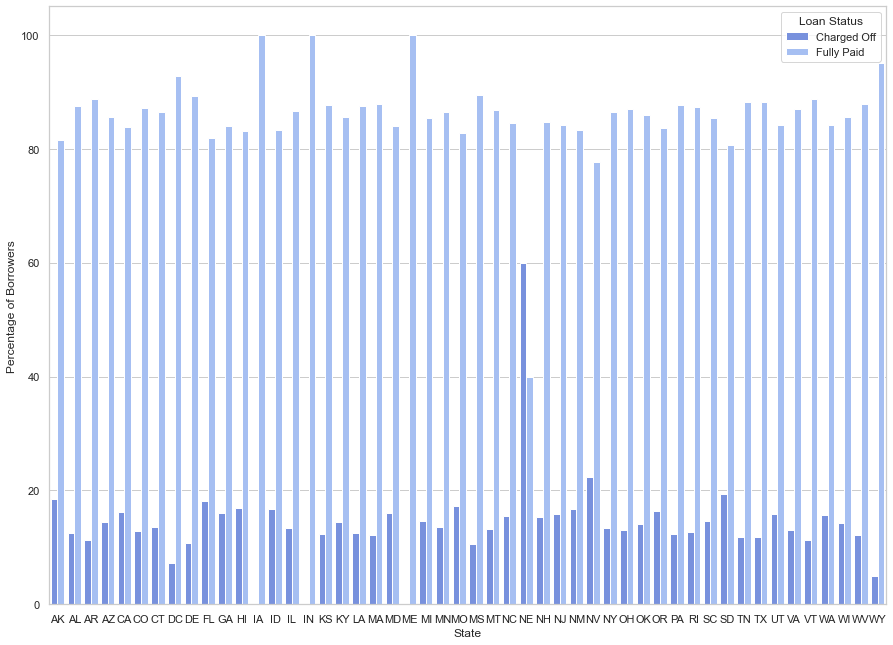

In [110]:
loan_status_state_percent = loan_status_state_count * 100 / addr_state_count
loan_status_state_percent.rename({'addr_state':'state'}, axis='columns', inplace = True)
loan_status_state_percent.reset_index(inplace = True)

plt.figure(figsize = (15, 11))
sns.barplot(x = 'addr_state', y = 'state', hue = 'loan_status', data = loan_status_state_percent)
plt.xlabel("State")
plt.ylabel("Percentage of Borrowers")
plt.legend(title = "Loan Status")
plt.show()

#### - Appliers from the states Nevada and South Dakota are likely to default the loan
#### - Appliers from the states Washington D.C. and Wyoming are likely to fully repay the loan

<h2 style = "color : Green">8. Analysis based on verification status </h2>

In [111]:
verification_status_count = df_not_current.pivot_table(index = 'verification_status', values = 'loan_status', aggfunc = {'verification_status': 'count'})    
loan_status_verfn_count = df_not_current.pivot_table(index = ['verification_status', 'loan_status'], aggfunc = {'verification_status': 'count'})
loan_status_verfn_pecent = loan_status_verfn_count * 100 / verification_status_count

# Get top category who has Fully Paid
top_paid = max(loan_status_verfn_pecent.iloc[np.arange(1, len(loan_status_verfn_pecent), 2),0])

# Get top category who has resulted in Charged-Off
top_choff = max(loan_status_verfn_pecent.iloc[np.arange(0, len(loan_status_verfn_pecent), 2),0])

loan_status_verfn_pcnt_sty = loan_status_verfn_pecent.style.format({'verification_status':'{0:,.2f}%'})
loan_status_verfn_pcnt_sty

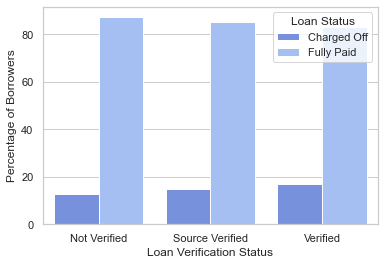

In [112]:
loan_status_verfn_pecent = loan_status_verfn_count * 100 / verification_status_count
loan_status_verfn_pecent.rename({'verification_status':'verfn'}, axis='columns', inplace = True)
loan_status_verfn_pecent.reset_index(inplace = True)

sns.barplot(x = 'verification_status', y = 'verfn', hue = 'loan_status', data = loan_status_verfn_pecent)
plt.xlabel("Loan Verification Status")
plt.ylabel("Percentage of Borrowers")
plt.legend(title = "Loan Status")
plt.show()

#### - As per the above graph we can see that verified Appliers tend to default more than Not Verified Appliers

<AxesSubplot:>

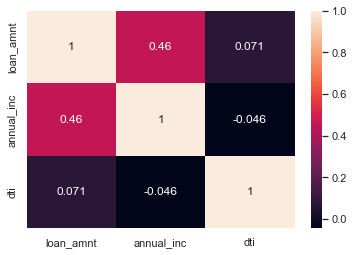

In [113]:
# Let's now have a look at the correlation between loan amount, annual income and dti using heatmap

choff = df_not_current.loc[df_not_current['loan_status'] == 'Charged Off']
sns.heatmap(choff[['loan_amnt', 'annual_inc', 'dti']].corr(), annot = True)

#### - As per the  there is less correlation (0.46) between loan amount and annual income in case of default loans, so, no relationship exists between loan default with annual income and loan amount